# Battle Of The Neighborhood

# INTRODUCTION

People across the globe , are unaware of the fact that it is possible to know the best location where they can reside if they wish to shift their home to a particular location. In my Project I have taken an example of a person shifting to Toronto, Canada . Around 187,950 people migrated from across the world to toronto , Canada between the year 2011 to 2016, which makes it 6.1 % of the total population. Different people of varied culture and background have different needs. Some move in with a family, some are students, some of them want to just start a business and are looking for a better place to start their small businesses but are unaware are less educated as to where should they start their base. Right Place to start a family or a business matters. Having a proper and a perfect location will decide whether a family will have all the things they need is present , and whether a businessman will have a successful business or not.

**The target audience are:**

1.The family (having a kid) who needs to migrate to Toronto Borough and are in search of a good place having basic ameities and requirements like a school or a university,malls,restaurants,hopitals,gym and a few more.

2.Small businessman who wants to grow or build their business and wants to know which place has less density or restaurants or gym or malls and also their ratings , likes , etc.

**objective:**

The objective of my project is to make people aware of the places that are suitable to them by providing them details about the places that they wish they had near them. This project also provides the ratings , number of likes and tips of that particular place of the neighborhood of the respective Borough.

In my project I have considered three Borough of Toronto - North York, East Toronto and Central Toronto.

# DATA REQUIRED FOR THE PROJECT

**To solve this problem I needed some data:**

1. All the Borough of Toronto so as to take out the considered Borough for the project.

2. Latitudes and longitude needed of the respective Borough of Toronto (so as to pass the location to the foursquare API).

3. Venue details of the places nearby the Borough of toronto.

4. Ratings , Likes and Tips of the place nearby the Borough of toronto.

**Source for the Data**:

1. To get the neighborhoods of toronto, I took help of  "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" . I wep scrapped this webpage using **beautifulSoup** .

2. I got the **Latitude** and the **Longitude** of the respective neighborhoods of Toronto through "https://cocl.us/Geospatial_data".

3. To get the venue details such as name and category of that place and their ratings I took help of **Foursquare API** via the request library of Python which sent me a json data. **Fourquare API** has a database of 100+ million places .

# METHODOLOGY

First of all we will need the data which we will get from "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" by web scraping it with the help of a library called "BeautifulSoup" . We will extract all the neighbourhoods of Toronto and clean and process the data.

We will use the geographical coordinates of longitudes and latitudes which we will will get through geocoder package , so that we can use it in FOURSQUARE API.

We will use folium package to visualize the neighborhoods of Toronto, Canada.

Then we will get the data required for the project such as venue category and name of venue and also ratings with the help of request library and FOURSQUARE API.

Now, finally we will visualize the data to check the best option with the help of python libraries.

In [273]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [274]:
toronto=pd.read_csv('toronto_df.csv')

In [275]:
toronto.head()

Borough                           Neighbourhood Postcode   Latitude  \
0  Scarborough                          Malvern, Rouge      M1B  43.806686   
1  Scarborough  Rouge Hill, Port Union, Highland Creek      M1C  43.784535   
2  Scarborough       Guildwood, Morningside, West Hill      M1E  43.763573   
3  Scarborough                                  Woburn      M1G  43.770992   
4  Scarborough                               Cedarbrae      M1H  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [276]:
toronto.shape

(103, 5)

# Location Of Toronto

In [277]:
address = 'Toronto,Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


# Neighbourhoods Of Toronto

In [278]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(toronto['Latitude'], toronto['Longitude'], toronto['Borough'], toronto['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [279]:
toronto

Borough                                      Neighbourhood  \
0         Scarborough                                     Malvern, Rouge   
1         Scarborough             Rouge Hill, Port Union, Highland Creek   
2         Scarborough                  Guildwood, Morningside, West Hill   
3         Scarborough                                             Woburn   
4         Scarborough                                          Cedarbrae   
5         Scarborough                                Scarborough Village   
6         Scarborough        Kennedy Park, Ionview, East Birchmount Park   
7         Scarborough                    Golden Mile, Clairlea, Oakridge   
8         Scarborough    Cliffside, Cliffcrest, Scarborough Village West   
9         Scarborough                        Birch Cliff, Cliffside West   
10        Scarborough  Dorset Park, Wexford Heights, Scarborough Town...   
11        Scarborough                                  Wexford, Maryvale   
12        Scarborough                                          Agincourt   
13        Scarborough            Clarks Corners, Tam O'Shanter, Sullivan   
14        Scarborough  Milliken, Agincourt North, Steeles East, L'Amo...   
15        Scarborough                      Steeles West, L'Amoreaux West   
16        Scarborough                                        Upper Rouge   
17         North York                                  Hillcrest Village   
18         North York                       Fairview, Henry Farm, Oriole   
19         North York                                    Bayview Village   
20         North York                           York Mills, Silver Hills   
21         North York                            Willowdale, Newtonbrook   
22         North York                        Willowdale, Willowdale East   
23         North York                                    York Mills West   
24         North York                        Willowdale, Willowdale West   
25         North York                                          Parkwoods   
26         North York                                          Don Mills   
27         North York                                          Don Mills   
28         North York    Bathurst Manor, Wilson Heights, Downsview North   
29         North York                    Northwood Park, York University   
30         North York                                          Downsview   
31         North York                                          Downsview   
32         North York                                          Downsview   
33         North York                                          Downsview   
34         North York                                   Victoria Village   
35          East York                    Parkview Hill, Woodbine Gardens   
36          East York                                   Woodbine Heights   
37       East Toronto                                        The Beaches   
38          East York                                            Leaside   
39          East York                                   Thorncliffe Park   
40          East York      East Toronto, Broadview North (Old East York)   
41       East Toronto                       The Danforth West, Riverdale   
42       East Toronto                     India Bazaar, The Beaches West   
43       East Toronto                                    Studio District   
44    Central Toronto                                      Lawrence Park   
45    Central Toronto                                   Davisville North   
46    Central Toronto                 North Toronto West,  Lawrence Park   
47    Central Toronto                                         Davisville   
48    Central Toronto                        Moore Park, Summerhill East   
49    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
50   Downtown Toronto                                           Rosedale   
51   Downtown Toronto                        St. James Town, C

In [280]:
toronto_ny = toronto[toronto['Borough'] == 'North York'].reset_index(drop=True)
toronto_east = toronto[toronto['Borough'] == 'East Toronto'].reset_index(drop=True)
toronto_central = toronto[toronto['Borough'] == 'Central Toronto'].reset_index(drop=True)
central_east = toronto_east.append(toronto_central).reset_index(drop=True)
toronto_overall = central_east.append(toronto_ny).reset_index(drop=True)
toronto_overall = toronto_overall.drop(['Postcode'], axis=1)

# Bar Graph Of Borough v/s No. Of Neighbourhoods

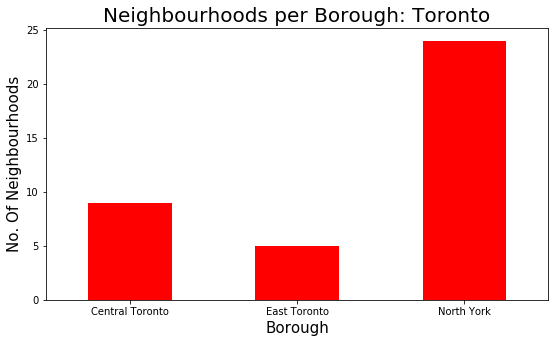

In [14]:
import matplotlib.pyplot as plt

clr = "red"
toronto_overall.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(9,5), color=clr)
plt.title('Neighbourhoods per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Of Neighbourhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()


# Use of FourSquare API starts

In [281]:
CLIENT_ID = 'LUXPRCNSV3SHQTN3ZPZOWM41EWNTOJAGKEZ4AHZBT3BMX0ZC' # your Foursquare ID
CLIENT_SECRET = 'JQHC4D4YQVO1Z0YGFZRP0XWXL00ATF540GWJPII2A00NWNYX' # your Foursquare Secret
VERSION = '20180604'
#LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LUXPRCNSV3SHQTN3ZPZOWM41EWNTOJAGKEZ4AHZBT3BMX0ZC
CLIENT_SECRET:JQHC4D4YQVO1Z0YGFZRP0XWXL00ATF540GWJPII2A00NWNYX


# Let us analyze North York(Neighbourhood of Toronto)

In [282]:
address = 'Toronto,Canada'
#address1 = 'Veena Sarang, Mumbai, Maharashtra, India'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
LIMIT=100

43.6534817 -79.3839347


In [142]:
search_query = 'Hospital'
#search_query = 'Indian'
radius = 10000
print(search_query + ' .... OK!')

Hospital .... OK!


In [143]:
def getNearbyVenues(names, latitudes, longitudes, radius=4000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'id',           
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [94]:
ny = getNearbyVenues(names=toronto_ny['Neighbourhood'],
                     latitudes=toronto_ny['Latitude'],
                     longitudes=toronto_ny['Longitude'],
                                  )


Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Bedford Park, Lawrence Manor East
Lawrence Manor, Lawrence Heights
Glencairn
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Humberlea, Emery


In [132]:
east = getNearbyVenues(names=toronto_east['Neighbourhood'],
                     latitudes=toronto_east['Latitude'],
                     longitudes=toronto_east['Longitude'],
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter Processing Plant Toronto


In [144]:
central = getNearbyVenues(names=toronto_central['Neighbourhood'],
                     latitudes=toronto_central['Latitude'],
                     longitudes=toronto_central['Longitude'],
                                  )

Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville


# Hospitals in North York with a radius of 4km

In [96]:
ny_hospital = ny[ny['Venue'].str.contains('Hospital')]
print(ny_hospital['id'].count())

0


# Malls in North York with a radius of 4km

In [97]:
ny_mall = ny[ny['Venue'].str.contains('Mall')]
print(ny_mall['id'].count())
ny_mall

4


Neighborhood  Neighborhood Latitude  \
89              Hillcrest Village              43.803762   
93              Hillcrest Village              43.803762   
125  Fairview, Henry Farm, Oriole              43.778517   
127  Fairview, Henry Farm, Oriole              43.778517   

     Neighborhood Longitude                           Venue  \
89               -79.363452  New York Fries - Fairview Mall   
93               -79.363452                CF Fairview Mall   
125              -79.346556  New York Fries - Fairview Mall   
127              -79.346556                CF Fairview Mall   

                           id  Venue Latitude  Venue Longitude Venue Category  
89   4af5ff72f964a520f6ff21e3       43.778605       -79.343577     Restaurant  
93   4ada3af3f964a520482021e3       43.777994       -79.343665  Shopping Mall  
125  4af5ff72f964a520f6ff21e3       43.778605       -79.343577     Restaurant  
127  4ada3af3f964a520482021e3       43.777994       -79.343665  Shopping Mall

# Restaurants in North York with a radius of 4km

In [98]:
ny_restaurant = ny[ny['Venue'].str.contains('Restaurant')]
print(ny_restaurant['id'].count())
ny_restaurant.head()

112


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
2   Hillcrest Village              43.803762              -79.363452   
14  Hillcrest Village              43.803762              -79.363452   
29  Hillcrest Village              43.803762              -79.363452   
32  Hillcrest Village              43.803762              -79.363452   
78  Hillcrest Village              43.803762              -79.363452   

                                        Venue                        id  \
2              Chinese Halal Restaurant 中華牛羊館  4ceea52a7db3224b4ddb282e   
14  Hot Spicy Spicy Chinese Restaurant 麻辣烫川菜馆  4b92db0cf964a520f12134e3   
29                       Jerusalem Restaurant  4b2ec400f964a52055e624e3   
32                  Aoyama & Sushi Restaurant  4b75f4c7f964a520f0312ee3   
78                    Phoenix Restaurant 金鳳餐廳  4af86560f964a520d80c22e3   

    Venue Latitude  Venue Longitude             Venue Category  
2        43.791272       -79.366980         Chinese Restaurant  
14       43.791343       -79.367494        Szechuan Restaurant  
29       43.778863       -79.364273  Middle Eastern Restaurant  
32       43.787145       -79.328940        Japanese Restaurant  
78       43.817722       -79.349424           Asian Restaurant

# University in North York with a radius of 4km

In [99]:
ny_university = ny[ny['Venue'].str.contains('University')]
ny_university['id'].count()

0

# Gym in North York with a radius of 4km

In [152]:
ny_gym = ny[ny['Venue'].str.contains('Gym')]
print(ny_gym['id'].count())
ny_gym

1


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1765  Victoria Village              43.725882              -79.315572   

                     Venue                        id  Venue Latitude  \
1765  East York Gymnastics  4b7aa47ef964a520fa342fe3       43.710654   

      Venue Longitude        Venue Category  
1765       -79.309279  Gym / Fitness Center

In [101]:
ny_overalldata = ny_gym.append(ny_mall).reset_index(drop=True)

In [102]:
ny_overalldata = ny_overalldata.append(ny_restaurant).reset_index(drop=True)

In [103]:
ny_overalldata

Neighborhood  Neighborhood Latitude  \
0                                   Victoria Village              43.725882   
1                                  Hillcrest Village              43.803762   
2                                  Hillcrest Village              43.803762   
3                       Fairview, Henry Farm, Oriole              43.778517   
4                       Fairview, Henry Farm, Oriole              43.778517   
5                                  Hillcrest Village              43.803762   
6                                  Hillcrest Village              43.803762   
7                                  Hillcrest Village              43.803762   
8                                  Hillcrest Village              43.803762   
9                                  Hillcrest Village              43.803762   
10                                 Hillcrest Village              43.803762   
11                      Fairview, Henry Farm, Oriole              43.778517   
12                      Fairview, Henry Farm, Oriole              43.778517   
13                      Fairview, Henry Farm, Oriole              43.778517   
14                      Fairview, Henry Farm, Oriole              43.778517   
15                      Fairview, Henry Farm, Oriole              43.778517   
16                      Fairview, Henry Farm, Oriole              43.778517   
17                      Fairview, Henry Farm, Oriole              43.778517   
18                                   Bayview Village              43.786947   
19                                   Bayview Village              43.786947   
20                                   Bayview Village              43.786947   
21                                   Bayview Village              43.786947   
22                                   Bayview Village              43.786947   
23                          York Mills, Silver Hills              43.757490   
24                          York Mills, Silver Hills              43.757490   
25                          York Mills, Silver Hills              43.757490   
26                          York Mills, Silver Hills              43.757490   
27                          York Mills, Silver Hills              43.757490   
28                           Willowdale, Newtonbrook              43.789053   
29                           Willowdale, Newtonbrook              43.789053   
30                           Willowdale, Newtonbrook              43.789053   
31                           Willowdale, Newtonbrook              43.789053   
32                           Willowdale, Newtonbrook              43.789053   
33                           Willowdale, Newtonbrook              43.789053   
34                           Willowdale, Newtonbrook              43.789053   
35                       Willowdale, Willowdale East              43.770120   
36                       Willowdale, Willowdale East              43.770120   
37                       Willowdale, Willowdale East              43.770120   
38                       Willowdale, Willowdale East              43.770120   
39                       Willowdale, Willowdale East              43.770120   
40                                   York Mills West              43.752758   
41                                   York Mills West              43.752758   
42                       Willowdale, Willowdale West              43.782736   
43                       Willowdale, Willowdale West              43.782736   
44                       Willowdale, Willowdale West              43.782736   
45                       Willowdale, Willowdale West              43.782736   
46                       Willowdale, Willowdale West              43.782736   
47                       Willowdale, Willowdale West              43.782736   
48                                         Parkwoods              43.753259   
49                                         Parkwoods              43.753259   
50         

# Now Let Us Find The All The Information For All The Neighbourhoods

In [283]:
def get_venues(lat,lng):
    #set variables
    radius=10000
    LIMIT=20
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

# Restaurants Of Mentioned Neighbourhoods

In [108]:
column_names=['Borough', 'Neighbourhood', 'ID','Name']
restaurant_toronto=pd.DataFrame(columns=column_names)
count=1

for row in toronto_overall.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    restaurant=venues[venues['Category']=='Restaurant'] 
    print(row)
    for restaurant_detail in restaurant.values.tolist():
        id, name , category=restaurant_detail
        restaurant_toronto = restaurant_toronto.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

['East Toronto', 'The Beaches', 43.67635739999999, -79.2930312]
['East Toronto', 'The Danforth West, Riverdale', 43.6795571, -79.352188]
['East Toronto', 'India Bazaar, The Beaches West', 43.6689985, -79.31557159999998]
['East Toronto', 'Studio District', 43.6595255, -79.340923]
['East Toronto', 'Business reply mail Processing Centre, South Central Letter Processing Plant Toronto', 43.6627439, -79.321558]
['Central Toronto', 'Lawrence Park', 43.7280205, -79.3887901]
['Central Toronto', 'Davisville North', 43.7127511, -79.3901975]
['Central Toronto', 'North Toronto West,  Lawrence Park', 43.7153834, -79.40567840000001]
['Central Toronto', 'Davisville', 43.7043244, -79.3887901]
['Central Toronto', 'Moore Park, Summerhill East', 43.6895743, -79.38315990000002]
['Central Toronto', 'Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park', 43.68641229999999, -79.4000493]
['Central Toronto', 'Roselawn', 43.7116948, -79.41693559999999]
['Central Toronto', 'Forest Hill North & West, 

In [109]:
restaurant_toronto.head()

Borough                                    Neighbourhood  \
0     East Toronto                                  Studio District   
1  Central Toronto              The Annex, North Midtown, Yorkville   
2       North York                         York Mills, Silver Hills   
3       North York                                        Don Mills   
4       North York  Bathurst Manor, Wilson Heights, Downsview North   

                         ID                                      Name  
0  5612b1cc498e3dd742af0dc8                            Impact Kitchen  
1  527d450111d25050de4ea0d8                                      Rasa  
2  4ad771f0f964a520900a21e3  The Keg Steakhouse + Bar - Leslie Street  
3  4edeeba1be7b760697d35b5e                                Bier Markt  
4  4b65c410f964a52050fe2ae3                                Bagel Plus

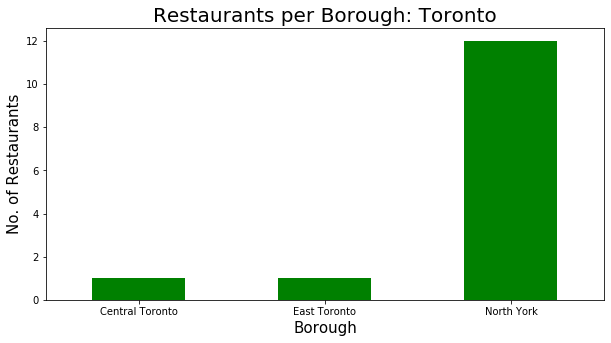

In [110]:
clr = "green"
restaurant_toronto.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Restaurants per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Restaurants',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()


# Malls In Mentioned Neighbourhood

In [285]:
column_names=['Borough', 'Neighbourhood', 'ID','Name']
mall_toronto=pd.DataFrame(columns=column_names)
count=1

for row in toronto_overall.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    mall=venues[venues['Category']=='Shopping Mall'] 
    print(row)
    for mall_detail in mall.values.tolist():
        id, name , category=mall_detail
        mall_toronto = mall_toronto.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

['East Toronto', 'The Beaches', 43.67635739999999, -79.2930312]
['East Toronto', 'The Danforth West, Riverdale', 43.6795571, -79.352188]
['East Toronto', 'India Bazaar, The Beaches West', 43.6689985, -79.31557159999998]
['East Toronto', 'Studio District', 43.6595255, -79.340923]
['East Toronto', 'Business reply mail Processing Centre, South Central Letter Processing Plant Toronto', 43.6627439, -79.321558]
['Central Toronto', 'Lawrence Park', 43.7280205, -79.3887901]
['Central Toronto', 'Davisville North', 43.7127511, -79.3901975]
['Central Toronto', 'North Toronto West,  Lawrence Park', 43.7153834, -79.40567840000001]
['Central Toronto', 'Davisville', 43.7043244, -79.3887901]
['Central Toronto', 'Moore Park, Summerhill East', 43.6895743, -79.38315990000002]
['Central Toronto', 'Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park', 43.68641229999999, -79.4000493]
['Central Toronto', 'Roselawn', 43.7116948, -79.41693559999999]
['Central Toronto', 'Forest Hill North & West, 

In [286]:
mall_toronto.head()

Borough                                    Neighbourhood  \
0  North York                         York Mills, Silver Hills   
1  North York                                        Parkwoods   
2  North York                                        Don Mills   
3  North York                                        Don Mills   
4  North York  Bathurst Manor, Wilson Heights, Downsview North   

                         ID                      Name  
0  4bc795d215a7ef3b97b279da     CF Shops at Don Mills  
1  4bc795d215a7ef3b97b279da     CF Shops at Don Mills  
2  4bc795d215a7ef3b97b279da     CF Shops at Don Mills  
3  4bc795d215a7ef3b97b279da     CF Shops at Don Mills  
4  4ad4c062f964a52002f820e3  Yorkdale Shopping Centre

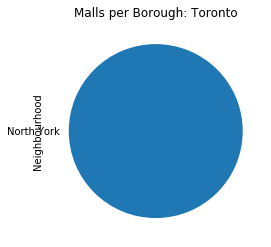

In [287]:
a=mall_toronto.groupby('Borough').count()
a['Neighbourhood'].plot(kind='pie')
plt.title('Malls per Borough: Toronto')
plt.show()

# Gym In Mentioned Neighbourhoods

In [158]:
column_names=['Borough', 'Neighbourhood', 'ID','Name']
gym_toronto=pd.DataFrame(columns=column_names)
count=1

for row in toronto_overall.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    gym=venues[venues['Category']=='Gym'] 
    print(row)
    for gym_detail in gym.values.tolist():
        id, name , category=restaurant_detail
        gym_toronto = gym_toronto.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

['East Toronto', 'The Beaches', 43.67635739999999, -79.2930312]
['East Toronto', 'The Danforth West, Riverdale', 43.6795571, -79.352188]
['East Toronto', 'India Bazaar, The Beaches West', 43.6689985, -79.31557159999998]
['East Toronto', 'Studio District', 43.6595255, -79.340923]
['East Toronto', 'Business reply mail Processing Centre, South Central Letter Processing Plant Toronto', 43.6627439, -79.321558]
['Central Toronto', 'Lawrence Park', 43.7280205, -79.3887901]
['Central Toronto', 'Davisville North', 43.7127511, -79.3901975]
['Central Toronto', 'North Toronto West,  Lawrence Park', 43.7153834, -79.40567840000001]
['Central Toronto', 'Davisville', 43.7043244, -79.3887901]
['Central Toronto', 'Moore Park, Summerhill East', 43.6895743, -79.38315990000002]
['Central Toronto', 'Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park', 43.68641229999999, -79.4000493]
['Central Toronto', 'Roselawn', 43.7116948, -79.41693559999999]
['Central Toronto', 'Forest Hill North & West, 

In [162]:
gym_toronto

Borough                       Neighbourhood  \
0  Central Toronto                       Lawrence Park   
1  Central Toronto                    Davisville North   
2  Central Toronto  North Toronto West,  Lawrence Park   
3  Central Toronto                          Davisville   
4       North York                           Don Mills   
5       North York                           Don Mills   
6       North York     Northwood Park, York University   
7       North York                    Victoria Village   
8       North York                    Humberlea, Emery   

                         ID               Name  
0  5ae3d754d3cce8002c86cbe1  RH Courtyard Café  
1  5ae3d754d3cce8002c86cbe1  RH Courtyard Café  
2  5ae3d754d3cce8002c86cbe1  RH Courtyard Café  
3  5ae3d754d3cce8002c86cbe1  RH Courtyard Café  
4  5ae3d754d3cce8002c86cbe1  RH Courtyard Café  
5  5ae3d754d3cce8002c86cbe1  RH Courtyard Café  
6  5ae3d754d3cce8002c86cbe1  RH Courtyard Café  
7  5ae3d754d3cce8002c86cbe1  RH Courtyard Café  
8  5ae3d754d3cce8002c86cbe1  RH Courtyard Café

In [234]:
ny_gym = ny[ny['Venue Category'].str.contains('Gym')]
east_gym = east[east['Venue'].str.contains('gym')]
central_gym = central[central['Venue'].str.contains('gym')]
total_gym = ny_gym.append(east_gym).reset_index(drop=True)
total_gym = total_gym.append(central_gym).reset_index(drop=True)
total_gym

Neighborhood  Neighborhood Latitude  \
0                                 Hillcrest Village              43.803762   
1                                 Hillcrest Village              43.803762   
2                      Fairview, Henry Farm, Oriole              43.778517   
3                      Fairview, Henry Farm, Oriole              43.778517   
4                          York Mills, Silver Hills              43.757490   
5                          York Mills, Silver Hills              43.757490   
6                          York Mills, Silver Hills              43.757490   
7                       Willowdale, Willowdale East              43.770120   
8                                   York Mills West              43.752758   
9                                   York Mills West              43.752758   
10                      Willowdale, Willowdale West              43.782736   
11                                        Parkwoods              43.753259   
12                                        Parkwoods              43.753259   
13                                        Parkwoods              43.753259   
14                                        Parkwoods              43.753259   
15                                        Don Mills              43.745906   
16                                        Don Mills              43.745906   
17                                        Don Mills              43.745906   
18                                        Don Mills              43.745906   
19                                        Don Mills              43.725900   
20                                        Don Mills              43.725900   
21                                        Don Mills              43.725900   
22                                        Don Mills              43.725900   
23                                        Don Mills              43.725900   
24                                        Don Mills              43.725900   
25  Bathurst Manor, Wilson Heights, Downsview North              43.754328   
26  Bathurst Manor, Wilson Heights, Downsview North              43.754328   
27                  Northwood Park, York University              43.767980   
28                  Northwood Park, York University              43.767980   
29                  Northwood Park, York University              43.767980   
30                                        Downsview              43.737473   
31                                        Downsview              43.737473   
32                                        Downsview              43.737473   
33                                        Downsview              43.739015   
34                                        Downsview              43.739015   
35                                        Downsview              43.739015   
36                                        Downsview              43.728496   
37                                        Downsview              43.728496   
38                                        Downsview              43.728496   
39                                        Downsview              43.761631   
40                                        Downsview              43.761631   
41                                 Victoria Village              43.725882   
42                                 Victoria Village              43.725882   
43                                 Victoria Village              43.725882   
44                                 Victoria Village              43.725882   
45                Bedford Park, Lawrence Manor East              43.733283   
46                Bedford Park, Lawrence Manor East              43.733283   
47                 Lawrence Manor, Lawrence Heights              43.718518   
48                 Lawrence Manor, Lawrence Heights              43.718518   
49         North Park, Maple Leaf Park, Upwood Park              43.713756   
50         North Park, Maple Leaf Park, Upwood Park          

In [244]:
total_gym["Borough"]="North York"
total_gym=total_gym.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Neighborhood Latitude','borough','Venue Category'],axis=1)

In [245]:
total_gym=total_gym.rename(columns={"Neighborhood": "Neighbourhood", "Venue": "Name", "id":"ID"})
total_gym

Neighbourhood  \
0                                 Hillcrest Village   
1                                 Hillcrest Village   
2                      Fairview, Henry Farm, Oriole   
3                      Fairview, Henry Farm, Oriole   
4                          York Mills, Silver Hills   
5                          York Mills, Silver Hills   
6                          York Mills, Silver Hills   
7                       Willowdale, Willowdale East   
8                                   York Mills West   
9                                   York Mills West   
10                      Willowdale, Willowdale West   
11                                        Parkwoods   
12                                        Parkwoods   
13                                        Parkwoods   
14                                        Parkwoods   
15                                        Don Mills   
16                                        Don Mills   
17                                        Don Mills   
18                                        Don Mills   
19                                        Don Mills   
20                                        Don Mills   
21                                        Don Mills   
22                                        Don Mills   
23                                        Don Mills   
24                                        Don Mills   
25  Bathurst Manor, Wilson Heights, Downsview North   
26  Bathurst Manor, Wilson Heights, Downsview North   
27                  Northwood Park, York University   
28                  Northwood Park, York University   
29                  Northwood Park, York University   
30                                        Downsview   
31                                        Downsview   
32                                        Downsview   
33                                        Downsview   
34                                        Downsview   
35                                        Downsview   
36                                        Downsview   
37                                        Downsview   
38                                        Downsview   
39                                        Downsview   
40                                        Downsview   
41                                 Victoria Village   
42                                 Victoria Village   
43                                 Victoria Village   
44                                 Victoria Village   
45                Bedford Park, Lawrence Manor East   
46                Bedford Park, Lawrence Manor East   
47                 Lawrence Manor, Lawrence Heights   
48                 Lawrence Manor, Lawrence Heights   
49         North Park, Maple Leaf Park, Upwood Park   
50         North Park, Maple Leaf Park, Upwood Park   
51                                 Humberlea, Emery   
52                                 Humberlea, Emery   

                                                 Name  \
0    GoodLife Fitness North York Steeles and Woodbine   
1                                       Mayfair Clubs   
2   GoodLife Fitness North York Sheppard and Consu...   
3                                          LA Fitness   
4       GoodLife Fitness North York York Mills Centre   
5                                        Granite Club   
6                                          LA Fitness   
7       GoodLife Fitness North York York Mills Centre   
8       GoodLife Fitness North York York Mills Centre   
9                                        Granite Club   
10                     Womens Fitness Clubs of Canada   
11              North Beach Indoor Volleyball Academy   
12                                         LA Fitness   
13                                 Fitness Connection   
14       GoodLife Fitness North York Victoria Terrace   
15                                         LA Fitness   
16              North Beach Indoor Volleyball Academy   
17                                 Fitnes

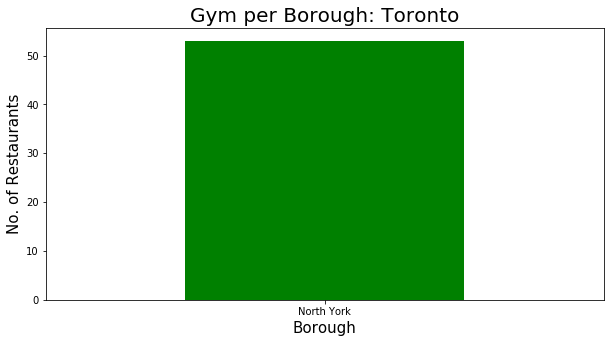

In [193]:
clr = "green"
total_gym.groupby('borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Gym per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Restaurants',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()


# Hospitals in Mentioned Neighbourhoods

In [114]:
column_names=['Borough', 'Neighbourhood', 'ID','Name']
Hospital_toronto=pd.DataFrame(columns=column_names)
count=1

for row in toronto_overall.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    Hospital=venues[venues['Category']=='Hospital'] 
    print(row)
    for Hospital_detail in Hospital.values.tolist():
        id, name , category=Hospital_detail
        Hospital_toronto = Hospital_toronto.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

['East Toronto', 'The Beaches', 43.67635739999999, -79.2930312]
['East Toronto', 'The Danforth West, Riverdale', 43.6795571, -79.352188]
['East Toronto', 'India Bazaar, The Beaches West', 43.6689985, -79.31557159999998]
['East Toronto', 'Studio District', 43.6595255, -79.340923]
['East Toronto', 'Business reply mail Processing Centre, South Central Letter Processing Plant Toronto', 43.6627439, -79.321558]
['Central Toronto', 'Lawrence Park', 43.7280205, -79.3887901]
['Central Toronto', 'Davisville North', 43.7127511, -79.3901975]
['Central Toronto', 'North Toronto West,  Lawrence Park', 43.7153834, -79.40567840000001]
['Central Toronto', 'Davisville', 43.7043244, -79.3887901]
['Central Toronto', 'Moore Park, Summerhill East', 43.6895743, -79.38315990000002]
['Central Toronto', 'Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park', 43.68641229999999, -79.4000493]
['Central Toronto', 'Roselawn', 43.7116948, -79.41693559999999]
['Central Toronto', 'Forest Hill North & West, 

In [115]:
Hospital_toronto

Empty DataFrame
Columns: [Borough, Neighbourhood, ID, Name]
Index: []

# University in Mentioned Neighbourhoods

In [117]:
column_names=['Borough', 'Neighbourhood', 'ID','Name']
University_toronto=pd.DataFrame(columns=column_names)
count=1

for row in toronto_overall.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    University=venues[venues['Category']=='University'] 
    print(row)
    for University_detail in University.values.tolist():
        id, name , category=University_detail
        University_toronto = University_toronto.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

['East Toronto', 'The Beaches', 43.67635739999999, -79.2930312]
['East Toronto', 'The Danforth West, Riverdale', 43.6795571, -79.352188]
['East Toronto', 'India Bazaar, The Beaches West', 43.6689985, -79.31557159999998]
['East Toronto', 'Studio District', 43.6595255, -79.340923]
['East Toronto', 'Business reply mail Processing Centre, South Central Letter Processing Plant Toronto', 43.6627439, -79.321558]
['Central Toronto', 'Lawrence Park', 43.7280205, -79.3887901]
['Central Toronto', 'Davisville North', 43.7127511, -79.3901975]
['Central Toronto', 'North Toronto West,  Lawrence Park', 43.7153834, -79.40567840000001]
['Central Toronto', 'Davisville', 43.7043244, -79.3887901]
['Central Toronto', 'Moore Park, Summerhill East', 43.6895743, -79.38315990000002]
['Central Toronto', 'Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park', 43.68641229999999, -79.4000493]
['Central Toronto', 'Roselawn', 43.7116948, -79.41693559999999]
['Central Toronto', 'Forest Hill North & West, 

In [118]:
University_toronto

Empty DataFrame
Columns: [Borough, Neighbourhood, ID, Name]
Index: []

# Let Us See Thr Ratings ,Likes And Tips For NY,Central and East Toronto Neighbourhood Venues

# 1.Restaurant

In [263]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [264]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
restaurant_toronto_rtl=pd.DataFrame(columns=column_names)
count=1
for row in restaurant_toronto.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(restaurant_toronto),')','processed')
    restaurant_toronto_rtl = restaurant_toronto_rtl.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


{'meta': {'code': 200, 'requestId': '5ed512f169babe001b8f1161'}, 'response': {'venue': {'id': '5612b1cc498e3dd742af0dc8', 'name': 'Impact Kitchen', 'contact': {'phone': '4163061986', 'formattedPhone': '(416) 306-1986', 'twitter': 'impactkitchen'}, 'location': {'address': '573 King St E', 'crossStreet': 'at St Lawrence St', 'lat': 43.65636850543279, 'lng': -79.35697968750694, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65636850543279, 'lng': -79.35697968750694}], 'postalCode': 'M5A 4L3', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['573 King St E (at St Lawrence St)', 'Toronto ON M5A 4L3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/impact-kitchen/5612b1cc498e3dd742af0dc8', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48

{'meta': {'code': 200, 'requestId': '5ed5137df7706a001bab9005'}, 'response': {'venue': {'id': '527d450111d25050de4ea0d8', 'name': 'Rasa', 'contact': {'phone': '6473508221', 'formattedPhone': '(647) 350-8221'}, 'location': {'address': '196 Robert Street', 'lat': 43.662756751275445, 'lng': -79.40398803188654, 'labeledLatLngs': [{'label': 'display', 'lat': 43.662756751275445, 'lng': -79.40398803188654}], 'postalCode': 'M5S 2K8', 'cc': 'CA', 'neighborhood': 'Downtown Toronto', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['196 Robert Street', 'Toronto ON M5S 2K8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/rasa/527d450111d25050de4ea0d8', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 38}, 'url': 'http://rasabar.ca', 'p

{'meta': {'code': 200, 'requestId': '5ed513999fcb92001b1a6769'}, 'response': {'venue': {'id': '4ad771f0f964a520900a21e3', 'name': 'The Keg Steakhouse + Bar - Leslie Street', 'contact': {'phone': '4164461045', 'formattedPhone': '(416) 446-1045', 'twitter': 'thekeg'}, 'location': {'address': '1977 Leslie Street', 'lat': 43.758797847809696, 'lng': -79.36074935128283, 'labeledLatLngs': [{'label': 'display', 'lat': 43.758797847809696, 'lng': -79.36074935128283}], 'postalCode': 'M3B 2M3', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1977 Leslie Street', 'Toronto ON M3B 2M3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/the-keg-steakhouse--bar--leslie-street/4ad771f0f964a520900a21e3', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': True, '

{'meta': {'code': 200, 'requestId': '5ed513103907e7001bae6c36'}, 'response': {'venue': {'id': '4edeeba1be7b760697d35b5e', 'name': 'Bier Markt', 'contact': {'phone': '4168627075', 'formattedPhone': '(416) 862-7075', 'facebook': '307336632751298', 'facebookUsername': 'BierMarktDonMills', 'facebookName': 'Bier Markt Don Mills'}, 'location': {'address': "67 O'neil Rd", 'crossStreet': 'at Shops at Don Mills', 'lat': 43.73367930227106, 'lng': -79.34446421133993, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73367930227106, 'lng': -79.34446421133993}], 'postalCode': 'M3C 0H2', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ["67 O'neil Rd (at Shops at Don Mills)", 'North York ON M3C 0H2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/bier-markt/4edeeba1be7b760697d35b5e', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/im

{'meta': {'code': 200, 'requestId': '5ed513590de0d9001bd021d9'}, 'response': {'venue': {'id': '4b65c410f964a52050fe2ae3', 'name': 'Bagel Plus', 'contact': {'phone': '4166359988', 'formattedPhone': '(416) 635-9988'}, 'location': {'address': '634 Sheppard Avenue W.', 'lat': 43.75539484400371, 'lng': -79.4406859789969, 'labeledLatLngs': [{'label': 'display', 'lat': 43.75539484400371, 'lng': -79.4406859789969}], 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['634 Sheppard Avenue W.', 'North York ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/bagel-plus/4b65c410f964a52050fe2ae3', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'cou

{'meta': {'code': 200, 'requestId': '5ed514101a4b0a001b3e6b96'}, 'response': {'venue': {'id': '4d02ddfbc2e53704abf9ad67', 'name': 'Elite Restaurant', 'contact': {}, 'location': {'address': '7-1126 Finch Ave W', 'lat': 43.767934815930396, 'lng': -79.47537888670135, 'labeledLatLngs': [{'label': 'display', 'lat': 43.767934815930396, 'lng': -79.47537888670135}], 'postalCode': 'M3J 3J6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['7-1126 Finch Ave W', 'Toronto ON M3J 3J6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/elite-restaurant/4d02ddfbc2e53704abf9ad67', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 4, 'groups': [{'t

{'meta': {'code': 200, 'requestId': '5ed512bd0a2972001b3b3b75'}, 'response': {'venue': {'id': '588cf74e5289302f30e711e1', 'name': 'Darbar Persian Grill', 'contact': {'phone': '6473514242', 'formattedPhone': '(647) 351-4242', 'facebook': '338899699524823', 'facebookName': 'Darbar Restaurant & Wine Lounge'}, 'location': {'address': '2015 Avenue Rd', 'lat': 43.735484, 'lng': -79.420006, 'labeledLatLngs': [{'label': 'display', 'lat': 43.735484, 'lng': -79.420006}], 'postalCode': 'M5M 4A5', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2015 Avenue Rd', 'North York ON M5M 4A5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/darbar-persian-grill/588cf74e5289302f30e711e1', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'ti

{'meta': {'code': 200, 'requestId': '5ed5129a0f59680025a16153'}, 'response': {'venue': {'id': '5ae3d754d3cce8002c86cbe1', 'name': 'RH Courtyard Café', 'contact': {'phone': '4163229422', 'formattedPhone': '(416) 322-9422'}, 'location': {'address': '3401 Dufferin Street', 'lat': 43.7248736, 'lng': -79.4555364, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7248736, 'lng': -79.4555364}], 'postalCode': 'M6A 2T9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3401 Dufferin Street', 'Toronto ON M6A 2T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/rh-courtyard-caf%C3%A9/5ae3d754d3cce8002c86cbe1', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'url': 'https://www.restorationhardware.com/content/category

{'meta': {'code': 200, 'requestId': '5ed512cdfb34b5001b0e3ea2'}, 'response': {'venue': {'id': '4b0ecb01f964a5201b5b23e3', 'name': "Harvey's", 'contact': {'phone': '4167870573', 'formattedPhone': '(416) 787-0573'}, 'location': {'address': '3120 Dufferin St', 'lat': 43.71533697302975, 'lng': -79.45539587874885, 'labeledLatLngs': [{'label': 'display', 'lat': 43.71533697302975, 'lng': -79.45539587874885}], 'postalCode': 'M6A 2S6', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3120 Dufferin St', 'North York ON M6A 2S6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/harveys/4b0ecb01f964a5201b5b23e3', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 8}, 'url': 'https://www.harveys.ca', 'price': {'tier': 2, 'mess

{'meta': {'code': 200, 'requestId': '5ed5137abe61c9001b040b0c'}, 'response': {'venue': {'id': '4b0ecb01f964a5201b5b23e3', 'name': "Harvey's", 'contact': {'phone': '4167870573', 'formattedPhone': '(416) 787-0573'}, 'location': {'address': '3120 Dufferin St', 'lat': 43.71533697302975, 'lng': -79.45539587874885, 'labeledLatLngs': [{'label': 'display', 'lat': 43.71533697302975, 'lng': -79.45539587874885}], 'postalCode': 'M6A 2S6', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3120 Dufferin St', 'North York ON M6A 2S6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/harveys/4b0ecb01f964a5201b5b23e3', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 8}, 'url': 'https://www.harveys.ca', 'price': {'tier': 2, 'mess

{'meta': {'code': 200, 'requestId': '5ed513b377af03001b26ddd2'}, 'response': {'venue': {'id': '5ae3d754d3cce8002c86cbe1', 'name': 'RH Courtyard Café', 'contact': {'phone': '4163229422', 'formattedPhone': '(416) 322-9422'}, 'location': {'address': '3401 Dufferin Street', 'lat': 43.7248736, 'lng': -79.4555364, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7248736, 'lng': -79.4555364}], 'postalCode': 'M6A 2T9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3401 Dufferin Street', 'Toronto ON M6A 2T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/rh-courtyard-caf%C3%A9/5ae3d754d3cce8002c86cbe1', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'url': 'https://www.restorationhardware.com/content/category

{'meta': {'code': 200, 'requestId': '5ed51250b4b684001b4e1b8a'}, 'response': {'venue': {'id': '4b0ecb01f964a5201b5b23e3', 'name': "Harvey's", 'contact': {'phone': '4167870573', 'formattedPhone': '(416) 787-0573'}, 'location': {'address': '3120 Dufferin St', 'lat': 43.71533697302975, 'lng': -79.45539587874885, 'labeledLatLngs': [{'label': 'display', 'lat': 43.71533697302975, 'lng': -79.45539587874885}], 'postalCode': 'M6A 2S6', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3120 Dufferin St', 'North York ON M6A 2S6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/harveys/4b0ecb01f964a5201b5b23e3', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 8}, 'url': 'https://www.harveys.ca', 'price': {'tier': 2, 'mess

{'meta': {'code': 200, 'requestId': '5ed513277828ae001b0e5d00'}, 'response': {'venue': {'id': '5ae3d754d3cce8002c86cbe1', 'name': 'RH Courtyard Café', 'contact': {'phone': '4163229422', 'formattedPhone': '(416) 322-9422'}, 'location': {'address': '3401 Dufferin Street', 'lat': 43.7248736, 'lng': -79.4555364, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7248736, 'lng': -79.4555364}], 'postalCode': 'M6A 2T9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3401 Dufferin Street', 'Toronto ON M6A 2T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/rh-courtyard-caf%C3%A9/5ae3d754d3cce8002c86cbe1', 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'url': 'https://www.restorationhardware.com/content/category

In [265]:
restaurant_toronto_rtl

Borough                                     Neighborhood  \
0      East Toronto                                  Studio District   
1   Central Toronto              The Annex, North Midtown, Yorkville   
2        North York                         York Mills, Silver Hills   
3        North York                                        Don Mills   
4        North York  Bathurst Manor, Wilson Heights, Downsview North   
5        North York                  Northwood Park, York University   
6        North York                                        Downsview   
7        North York                Bedford Park, Lawrence Manor East   
8        North York                 Lawrence Manor, Lawrence Heights   
9        North York                 Lawrence Manor, Lawrence Heights   
10       North York                                        Glencairn   
11       North York                                        Glencairn   
12       North York         North Park, Maple Leaf Park, Upwood Park   
13       North York         North Park, Maple Leaf Park, Upwood Park   

                          ID                                      Name Likes  \
0   5612b1cc498e3dd742af0dc8                            Impact Kitchen    52   
1   527d450111d25050de4ea0d8                                      Rasa    79   
2   4ad771f0f964a520900a21e3  The Keg Steakhouse + Bar - Leslie Street   102   
3   4edeeba1be7b760697d35b5e                                Bier Markt   100   
4   4b65c410f964a52050fe2ae3                                Bagel Plus    11   
5   4d02ddfbc2e53704abf9ad67                          Elite Restaurant     4   
6   5ae3d754d3cce8002c86cbe1                         RH Courtyard Café    16   
7   588cf74e5289302f30e711e1                      Darbar Persian Grill    14   
8   5ae3d754d3cce8002c86cbe1                         RH Courtyard Café    16   
9   4b0ecb01f964a5201b5b23e3                                  Harvey's    15   
10  4b0ecb01f964a5201b5b23e3                                  Harvey's    15   
11  5ae3d754d3cce8002c86cbe1                         RH Courtyard Café    16   
12  4b0ecb01f964a5201b5b23e3                                  Harvey's    15   
13  5ae3d754d3cce8002c86cbe1                         RH Courtyard Café    16   

    Rating Tips  
0      8.9    9  
1      9.0   38  
2      7.9   32  
3      7.8   61  
4      7.5    4  
5      7.5    5  
6      8.2    1  
7      7.7    2  
8      8.2    1  
9      8.1    8  
10     8.1    8  
11     8.2    1  
12     8.1    8  
13     8.2    1

In [266]:
restaurant_toronto_rtl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
Borough         14 non-null object
Neighborhood    14 non-null object
ID              14 non-null object
Name            14 non-null object
Likes           14 non-null object
Rating          14 non-null float64
Tips            14 non-null object
dtypes: float64(1), object(6)
memory usage: 864.0+ bytes


In [267]:
restaurant_toronto_rtl['Likes']=restaurant_toronto_rtl['Likes'].astype('float64')
restaurant_toronto_rtl['Rating']=restaurant_toronto_rtl['Rating'].astype('float64')
restaurant_toronto_rtl['Tips']=restaurant_toronto_rtl['Tips'].astype('float64')
restaurant_toronto_rtl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
Borough         14 non-null object
Neighborhood    14 non-null object
ID              14 non-null object
Name            14 non-null object
Likes           14 non-null float64
Rating          14 non-null float64
Tips            14 non-null float64
dtypes: float64(3), object(4)
memory usage: 864.0+ bytes


In [268]:
restaurant_toronto_rtl.describe()

Likes     Rating       Tips
count   14.000000  14.000000  14.000000
mean    33.642857   8.100000  12.785714
std     34.569010   0.438529  18.022117
min      4.000000   7.500000   1.000000
25%     15.000000   7.825000   1.250000
50%     16.000000   8.100000   6.500000
75%     43.000000   8.200000   8.750000
max    102.000000   9.000000  61.000000

## 2.MALLS

In [231]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
mall_toronto_rtl=pd.DataFrame(columns=column_names)
count=1
for row in mall_toronto.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        #print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        #print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    #print('(',count,'/',len(restaurant_toronto),')','processed')
    mall_toronto_rtl = mall_toronto_rtl.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


{'meta': {'code': 200, 'requestId': '5ed50d6595feaf001bffbf00'}, 'response': {'venue': {'id': '4ad4c062f964a5200df820e3', 'name': 'Bloor-Yorkville', 'contact': {'phone': '4169283553', 'formattedPhone': '(416) 928-3553'}, 'location': {'address': '55 Bloor St. W', 'lat': 43.670214354942, 'lng': -79.39104696860365, 'labeledLatLngs': [{'label': 'display', 'lat': 43.670214354942, 'lng': -79.39104696860365}], 'postalCode': 'M4W 1A5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['55 Bloor St. W', 'Toronto ON M4W 1A5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/blooryorkville/4ad4c062f964a5200df820e3', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'url': 'http://www.bloor-yorkville.com', 'likes': {'count': 

{'meta': {'code': 200, 'requestId': '5ed50df90f5968002592a00a'}, 'response': {'venue': {'id': '4af98293f964a520091222e3', 'name': 'Bayview Village', 'contact': {'phone': '4162260404', 'formattedPhone': '(416) 226-0404', 'twitter': 'bvshops', 'instagram': 'bvshops'}, 'location': {'address': '2901 Bayview Ave.', 'crossStreet': 'at Sheppard Ave. E', 'lat': 43.768526899497374, 'lng': -79.38549394188291, 'labeledLatLngs': [{'label': 'display', 'lat': 43.768526899497374, 'lng': -79.38549394188291}], 'postalCode': 'M2K 1E6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2901 Bayview Ave. (at Sheppard Ave. E)', 'Toronto ON M2K 1E6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/bayview-village/4af98293f964a520091222e3', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}, 'primar

{'meta': {'code': 200, 'requestId': '5ed50c4d02a172001b1c9827'}, 'response': {'venue': {'id': '4bc795d215a7ef3b97b279da', 'name': 'CF Shops at Don Mills', 'contact': {'phone': '4164470618', 'formattedPhone': '(416) 447-0618'}, 'location': {'address': '1090 Don Mills Rd.', 'crossStreet': 'at Lawrence Ave E', 'lat': 43.73501112909844, 'lng': -79.34478724407985, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73501112909844, 'lng': -79.34478724407985}], 'postalCode': 'M3C 3R6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1090 Don Mills Rd. (at Lawrence Ave E)', 'Toronto ON M3C 3R6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/cf-shops-at-don-mills/4bc795d215a7ef3b97b279da', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

{'meta': {'code': 200, 'requestId': '5ed50e6ab1cac0001b2cee5b'}, 'response': {'venue': {'id': '4bc795d215a7ef3b97b279da', 'name': 'CF Shops at Don Mills', 'contact': {'phone': '4164470618', 'formattedPhone': '(416) 447-0618'}, 'location': {'address': '1090 Don Mills Rd.', 'crossStreet': 'at Lawrence Ave E', 'lat': 43.73501112909844, 'lng': -79.34478724407985, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73501112909844, 'lng': -79.34478724407985}], 'postalCode': 'M3C 3R6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1090 Don Mills Rd. (at Lawrence Ave E)', 'Toronto ON M3C 3R6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/cf-shops-at-don-mills/4bc795d215a7ef3b97b279da', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

{'meta': {'code': 200, 'requestId': '5ed50dcca2e538001bc2d632'}, 'response': {'venue': {'id': '4bc795d215a7ef3b97b279da', 'name': 'CF Shops at Don Mills', 'contact': {'phone': '4164470618', 'formattedPhone': '(416) 447-0618'}, 'location': {'address': '1090 Don Mills Rd.', 'crossStreet': 'at Lawrence Ave E', 'lat': 43.73501112909844, 'lng': -79.34478724407985, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73501112909844, 'lng': -79.34478724407985}], 'postalCode': 'M3C 3R6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1090 Don Mills Rd. (at Lawrence Ave E)', 'Toronto ON M3C 3R6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/cf-shops-at-don-mills/4bc795d215a7ef3b97b279da', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

{'meta': {'code': 200, 'requestId': '5ed50e6f78a484001bdbe245'}, 'response': {'venue': {'id': '4ad4c062f964a52002f820e3', 'name': 'Yorkdale Shopping Centre', 'contact': {'phone': '4167893261', 'formattedPhone': '(416) 789-3261', 'twitter': 'yorkdalestyle', 'instagram': 'yorkdalestyle', 'facebook': '137037229903', 'facebookUsername': 'Yorkdale', 'facebookName': 'Yorkdale Shopping Centre'}, 'location': {'address': '3401 Dufferin Street', 'lat': 43.72548184266099, 'lng': -79.45273563264436, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72548184266099, 'lng': -79.45273563264436}], 'postalCode': 'M6A 2T9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3401 Dufferin Street', 'Toronto ON M6A 2T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/yorkdale-shopping-centre/4ad4c062f964a52002f820e3', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '5ed50e8c83525f001be448b0'}, 'response': {'venue': {'id': '4ad4c062f964a52002f820e3', 'name': 'Yorkdale Shopping Centre', 'contact': {'phone': '4167893261', 'formattedPhone': '(416) 789-3261', 'twitter': 'yorkdalestyle', 'instagram': 'yorkdalestyle', 'facebook': '137037229903', 'facebookUsername': 'Yorkdale', 'facebookName': 'Yorkdale Shopping Centre'}, 'location': {'address': '3401 Dufferin Street', 'lat': 43.72548184266099, 'lng': -79.45273563264436, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72548184266099, 'lng': -79.45273563264436}], 'postalCode': 'M6A 2T9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3401 Dufferin Street', 'Toronto ON M6A 2T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/yorkdale-shopping-centre/4ad4c062f964a52002f820e3', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '5ed50db3b4b684001b3f6015'}, 'response': {'venue': {'id': '4ad4c062f964a52002f820e3', 'name': 'Yorkdale Shopping Centre', 'contact': {'phone': '4167893261', 'formattedPhone': '(416) 789-3261', 'twitter': 'yorkdalestyle', 'instagram': 'yorkdalestyle', 'facebook': '137037229903', 'facebookUsername': 'Yorkdale', 'facebookName': 'Yorkdale Shopping Centre'}, 'location': {'address': '3401 Dufferin Street', 'lat': 43.72548184266099, 'lng': -79.45273563264436, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72548184266099, 'lng': -79.45273563264436}], 'postalCode': 'M6A 2T9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3401 Dufferin Street', 'Toronto ON M6A 2T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/yorkdale-shopping-centre/4ad4c062f964a52002f820e3', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '5ed50d7f98205d001be6bce8'}, 'response': {'venue': {'id': '4ad4c062f964a52002f820e3', 'name': 'Yorkdale Shopping Centre', 'contact': {'phone': '4167893261', 'formattedPhone': '(416) 789-3261', 'twitter': 'yorkdalestyle', 'instagram': 'yorkdalestyle', 'facebook': '137037229903', 'facebookUsername': 'Yorkdale', 'facebookName': 'Yorkdale Shopping Centre'}, 'location': {'address': '3401 Dufferin Street', 'lat': 43.72548184266099, 'lng': -79.45273563264436, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72548184266099, 'lng': -79.45273563264436}], 'postalCode': 'M6A 2T9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3401 Dufferin Street', 'Toronto ON M6A 2T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/yorkdale-shopping-centre/4ad4c062f964a52002f820e3', 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 

In [228]:
mall_toronto_rtl

Borough                              Neighborhood  \
0  Central Toronto       The Annex, North Midtown, Yorkville   
1       North York                           Bayview Village   
2       North York                  York Mills, Silver Hills   
3       North York                                 Parkwoods   
4       North York                                 Don Mills   
5       North York                                 Don Mills   
6       North York                                 Downsview   
7       North York          Lawrence Manor, Lawrence Heights   
8       North York                                 Glencairn   
9       North York  North Park, Maple Leaf Park, Upwood Park   

                         ID                      Name Likes  Rating Tips  
0  4ad4c062f964a5200df820e3           Bloor-Yorkville    31     8.4    3  
1  4af98293f964a520091222e3           Bayview Village   156     7.7   35  
2  4af98293f964a520091222e3           Bayview Village   156     7.7   35  
3  4bc795d215a7ef3b97b279da     CF Shops at Don Mills   229     8.5   44  
4  4bc795d215a7ef3b97b279da     CF Shops at Don Mills   229     8.5   44  
5  4bc795d215a7ef3b97b279da     CF Shops at Don Mills   229     8.5   44  
6  4ad4c062f964a52002f820e3  Yorkdale Shopping Centre  1550     8.3  169  
7  4ad4c062f964a52002f820e3  Yorkdale Shopping Centre  1550     8.3  169  
8  4ad4c062f964a52002f820e3  Yorkdale Shopping Centre  1550     8.3  169  
9  4ad4c062f964a52002f820e3  Yorkdale Shopping Centre  1550     8.3  169

In [258]:
mall_toronto_rtl['Likes']=mall_toronto_rtl['Likes'].astype('float64')
mall_toronto_rtl['Rating']=mall_toronto_rtl['Rating'].astype('float64')
mall_toronto_rtl['Tips']=mall_toronto_rtl['Tips'].astype('float64')
mall_toronto_rtl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
Borough         10 non-null object
Neighborhood    10 non-null object
ID              10 non-null object
Name            10 non-null object
Likes           10 non-null float64
Rating          10 non-null float64
Tips            10 non-null float64
dtypes: float64(3), object(4)
memory usage: 640.0+ bytes


In [259]:
mall_toronto_rtl.describe()

Likes     Rating        Tips
count    10.000000  10.000000   10.000000
mean    723.000000   8.250000   88.100000
std     714.116859   0.302765   70.628055
min      31.000000   7.700000    3.000000
25%     174.250000   8.300000   37.250000
50%     229.000000   8.300000   44.000000
75%    1550.000000   8.475000  169.000000
max    1550.000000   8.500000  169.000000

# 3.GYMS

In [246]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
gym_toronto_rtl=pd.DataFrame(columns=column_names)
count=1
for row in  total_gym.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        #print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        #print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    #print('(',count,'/',len(restaurant_toronto),')','processed')
    gym_toronto_rtl = gym_toronto_rtl.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


{'meta': {'code': 200, 'requestId': '5ed510dc949393001c4c067a'}, 'response': {'venue': {'id': '4bb4ccb486a8d13a7ce1de7f', 'name': 'GoodLife Fitness North York Steeles and Woodbine', 'contact': {'phone': '4164943221', 'formattedPhone': '(416) 494-3221', 'twitter': 'goodlifefitness', 'facebook': '116230838396171', 'facebookUsername': 'goodlifefitness', 'facebookName': 'GoodLife Fitness'}, 'location': {'address': '3389 Steeles Ave E', 'crossStreet': 'btwen Woodbine & Victoria Park', 'lat': 43.814922, 'lng': -79.344033, 'labeledLatLngs': [{'label': 'display', 'lat': 43.814922, 'lng': -79.344033}], 'postalCode': 'M2H 3S7', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3389 Steeles Ave E (btwen Woodbine & Victoria Park)', 'North York ON M2H 3S7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/goodlife-fitness-north-york-steeles-and-woodbine/4bb4ccb486a8d13a7ce1de7f', 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralN

{'meta': {'code': 200, 'requestId': '5ed5108278a484001be284d1'}, 'response': {'venue': {'id': '4bbf736b85fbb71367387267', 'name': 'Mayfair Clubs', 'contact': {'phone': '9054750350', 'formattedPhone': '(905) 475-0350', 'facebook': '486785918053018', 'facebookUsername': 'mayfairclubstoronto', 'facebookName': 'Mayfair Clubs'}, 'location': {'address': '50 Steelecase Rd. E', 'crossStreet': 'at Woodbine Ave.', 'lat': 43.820255018851874, 'lng': -79.34904494454568, 'labeledLatLngs': [{'label': 'display', 'lat': 43.820255018851874, 'lng': -79.34904494454568}], 'postalCode': 'L3R 1E8', 'cc': 'CA', 'city': 'Markham', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['50 Steelecase Rd. E (at Woodbine Ave.)', 'Markham ON L3R 1E8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mayfair-clubs/4bbf736b85fbb71367387267', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix'

{'meta': {'code': 200, 'requestId': '5ed51110618f43001bc1f81d'}, 'response': {'venue': {'id': '4c18e819d4d9c9284e19f029', 'name': 'LA Fitness', 'contact': {'phone': '4163910220', 'formattedPhone': '(416) 391-0220', 'twitter': 'lafitness'}, 'location': {'address': '1380 Don Mills Road', 'crossStreet': 'Mallard Rd', 'lat': 43.74766522888878, 'lng': -79.34707696065234, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74766522888878, 'lng': -79.34707696065234}], 'postalCode': 'M3B 2X2', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1380 Don Mills Road (Mallard Rd)', 'Toronto ON M3B 2X2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/la-fitness/4c18e819d4d9c9284e19f029', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verifi

{'meta': {'code': 200, 'requestId': '5ed510529388d7001be6d538'}, 'response': {'venue': {'id': '4b22e0a0f964a520544f24e3', 'name': 'Granite Club', 'contact': {'phone': '4165106668', 'formattedPhone': '(416) 510-6668'}, 'location': {'address': '2350 Bayview Ave.', 'crossStreet': 'Lawrence Ave. West', 'lat': 43.7330429446901, 'lng': -79.38198601664295, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7330429446901, 'lng': -79.38198601664295}], 'postalCode': 'M2L 1E4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2350 Bayview Ave. (Lawrence Ave. West)', 'Toronto ON M2L 1E4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/granite-club/4b22e0a0f964a520544f24e3', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verified': False

{'meta': {'code': 200, 'requestId': '5ed50f32aba297001bf26702'}, 'response': {'venue': {'id': '56d484efcd10b98f5098c328', 'name': 'GoodLife Fitness North York York Mills Centre', 'contact': {'phone': '4162213488', 'formattedPhone': '(416) 221-3488', 'twitter': 'goodlifefitness', 'facebook': '116230838396171', 'facebookUsername': 'goodlifefitness', 'facebookName': 'GoodLife Fitness'}, 'location': {'address': '4025 Yonge St', 'crossStreet': 'York Mills Road', 'lat': 43.744871, 'lng': -79.406289, 'labeledLatLngs': [{'label': 'display', 'lat': 43.744871, 'lng': -79.406289}], 'postalCode': 'M2P 2E3', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['4025 Yonge St (York Mills Road)', 'North York ON M2P 2E3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/goodlife-fitness-north-york-york-mills-centre/56d484efcd10b98f5098c328', 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'pr

{'meta': {'code': 200, 'requestId': '5ed5109e3907e7001ba6a1cf'}, 'response': {'venue': {'id': '56d484efcd10b98f5098c328', 'name': 'GoodLife Fitness North York York Mills Centre', 'contact': {'phone': '4162213488', 'formattedPhone': '(416) 221-3488', 'twitter': 'goodlifefitness', 'facebook': '116230838396171', 'facebookUsername': 'goodlifefitness', 'facebookName': 'GoodLife Fitness'}, 'location': {'address': '4025 Yonge St', 'crossStreet': 'York Mills Road', 'lat': 43.744871, 'lng': -79.406289, 'labeledLatLngs': [{'label': 'display', 'lat': 43.744871, 'lng': -79.406289}], 'postalCode': 'M2P 2E3', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['4025 Yonge St (York Mills Road)', 'North York ON M2P 2E3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/goodlife-fitness-north-york-york-mills-centre/56d484efcd10b98f5098c328', 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'pr

{'meta': {'code': 200, 'requestId': '5ed510a147e0d6001b8487bc'}, 'response': {'venue': {'id': '4b22e0a0f964a520544f24e3', 'name': 'Granite Club', 'contact': {'phone': '4165106668', 'formattedPhone': '(416) 510-6668'}, 'location': {'address': '2350 Bayview Ave.', 'crossStreet': 'Lawrence Ave. West', 'lat': 43.7330429446901, 'lng': -79.38198601664295, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7330429446901, 'lng': -79.38198601664295}], 'postalCode': 'M2L 1E4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2350 Bayview Ave. (Lawrence Ave. West)', 'Toronto ON M2L 1E4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/granite-club/4b22e0a0f964a520544f24e3', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verified': False

{'meta': {'code': 200, 'requestId': '5ed51161b57e88001b2982dd'}, 'response': {'venue': {'id': '4b4fd4a9f964a520fd1627e3', 'name': 'North Beach Indoor Volleyball Academy', 'contact': {'phone': '4164460777', 'formattedPhone': '(416) 446-0777'}, 'location': {'address': '74 Railside Rd', 'lat': 43.73719098696113, 'lng': -79.32371442851704, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73719098696113, 'lng': -79.32371442851704}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['74 Railside Rd', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/north-beach-indoor-volleyball-academy/4b4fd4a9f964a520fd1627e3', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'likes': {'count'

{'meta': {'code': 200, 'requestId': '5ed51064b9a389001b27a746'}, 'response': {'venue': {'id': '4b71ff80f964a52035692de3', 'name': 'Fitness Connection', 'contact': {}, 'location': {'address': '900 Don Mills Road', 'lat': 43.72747286430573, 'lng': -79.34170684305083, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72747286430573, 'lng': -79.34170684305083}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['900 Don Mills Road', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/fitness-connection/4b71ff80f964a52035692de3', 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://www.fitnessconnection.ca', 'likes': {'count': 10, 'groups': [{'type': 'others', 'count': 10, 'items': []}], 'summary': '10 Likes'}, 'di

{'meta': {'code': 200, 'requestId': '5ed50f40aba297001bf29351'}, 'response': {'venue': {'id': '4c18e819d4d9c9284e19f029', 'name': 'LA Fitness', 'contact': {'phone': '4163910220', 'formattedPhone': '(416) 391-0220', 'twitter': 'lafitness'}, 'location': {'address': '1380 Don Mills Road', 'crossStreet': 'Mallard Rd', 'lat': 43.74766522888878, 'lng': -79.34707696065234, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74766522888878, 'lng': -79.34707696065234}], 'postalCode': 'M3B 2X2', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1380 Don Mills Road (Mallard Rd)', 'Toronto ON M3B 2X2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/la-fitness/4c18e819d4d9c9284e19f029', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verifi

{'meta': {'code': 200, 'requestId': '5ed5110dbe61c9001bfc5503'}, 'response': {'venue': {'id': '4b71ff80f964a52035692de3', 'name': 'Fitness Connection', 'contact': {}, 'location': {'address': '900 Don Mills Road', 'lat': 43.72747286430573, 'lng': -79.34170684305083, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72747286430573, 'lng': -79.34170684305083}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['900 Don Mills Road', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/fitness-connection/4b71ff80f964a52035692de3', 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://www.fitnessconnection.ca', 'likes': {'count': 10, 'groups': [{'type': 'others', 'count': 10, 'items': []}], 'summary': '10 Likes'}, 'di

{'meta': {'code': 200, 'requestId': '5ed50fbb71c428001bfe77f8'}, 'response': {'venue': {'id': '4b71ff80f964a52035692de3', 'name': 'Fitness Connection', 'contact': {}, 'location': {'address': '900 Don Mills Road', 'lat': 43.72747286430573, 'lng': -79.34170684305083, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72747286430573, 'lng': -79.34170684305083}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['900 Don Mills Road', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/fitness-connection/4b71ff80f964a52035692de3', 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://www.fitnessconnection.ca', 'likes': {'count': 10, 'groups': [{'type': 'others', 'count': 10, 'items': []}], 'summary': '10 Likes'}, 'di

{'meta': {'code': 200, 'requestId': '5ed50f64963d29001b5fd472'}, 'response': {'venue': {'id': '4b4fd4a9f964a520fd1627e3', 'name': 'North Beach Indoor Volleyball Academy', 'contact': {'phone': '4164460777', 'formattedPhone': '(416) 446-0777'}, 'location': {'address': '74 Railside Rd', 'lat': 43.73719098696113, 'lng': -79.32371442851704, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73719098696113, 'lng': -79.32371442851704}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['74 Railside Rd', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/north-beach-indoor-volleyball-academy/4b4fd4a9f964a520fd1627e3', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'likes': {'count'

{'meta': {'code': 200, 'requestId': '5ed5113647b43d002368f082'}, 'response': {'venue': {'id': '4c18e819d4d9c9284e19f029', 'name': 'LA Fitness', 'contact': {'phone': '4163910220', 'formattedPhone': '(416) 391-0220', 'twitter': 'lafitness'}, 'location': {'address': '1380 Don Mills Road', 'crossStreet': 'Mallard Rd', 'lat': 43.74766522888878, 'lng': -79.34707696065234, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74766522888878, 'lng': -79.34707696065234}], 'postalCode': 'M3B 2X2', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1380 Don Mills Road (Mallard Rd)', 'Toronto ON M3B 2X2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/la-fitness/4c18e819d4d9c9284e19f029', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verifi

{'meta': {'code': 200, 'requestId': '5ed510a069babe001b87afe3'}, 'response': {'venue': {'id': '4b829a52f964a5204ada30e3', 'name': 'True North Climbing', 'contact': {'phone': '4163987625', 'formattedPhone': '(416) 398-7625', 'twitter': 'truenorthclimb'}, 'location': {'address': '75 Carl Hall Rd', 'crossStreet': 'Downsview Park Sports Center', 'lat': 43.74550748230518, 'lng': -79.47433161481919, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74550748230518, 'lng': -79.47433161481919}], 'postalCode': 'M3K 2B9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['75 Carl Hall Rd (Downsview Park Sports Center)', 'Toronto ON M3K 2B9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/true-north-climbing/4b829a52f964a5204ada30e3', 'categories': [{'id': '503289d391d4c4b30a586d6a', 'name': 'Climbing Gym', 'pluralName': 'Climbing Gyms', 'shortName': 'Climbing Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.p

{'meta': {'code': 200, 'requestId': '5ed510b86d8c56001bc660df'}, 'response': {'venue': {'id': '4b829a52f964a5204ada30e3', 'name': 'True North Climbing', 'contact': {'phone': '4163987625', 'formattedPhone': '(416) 398-7625', 'twitter': 'truenorthclimb'}, 'location': {'address': '75 Carl Hall Rd', 'crossStreet': 'Downsview Park Sports Center', 'lat': 43.74550748230518, 'lng': -79.47433161481919, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74550748230518, 'lng': -79.47433161481919}], 'postalCode': 'M3K 2B9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['75 Carl Hall Rd (Downsview Park Sports Center)', 'Toronto ON M3K 2B9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/true-north-climbing/4b829a52f964a5204ada30e3', 'categories': [{'id': '503289d391d4c4b30a586d6a', 'name': 'Climbing Gym', 'pluralName': 'Climbing Gyms', 'shortName': 'Climbing Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.p

{'meta': {'code': 200, 'requestId': '5ed510c247e0d6001b84f1fb'}, 'response': {'venue': {'id': '4b59d0fbf964a520bb9928e3', 'name': 'Mayfair Clubs', 'contact': {'phone': '4166381010', 'formattedPhone': '(416) 638-1010', 'facebook': '486785918053018', 'facebookUsername': 'mayfairclubstoronto', 'facebookName': 'Mayfair Clubs'}, 'location': {'address': '3855 Chesswood Dr.', 'crossStreet': 'Sheppard Ave. W.', 'lat': 43.7571117732519, 'lng': -79.474256474927, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7571117732519, 'lng': -79.474256474927}], 'postalCode': 'M3J 2W6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3855 Chesswood Dr. (Sheppard Ave. W.)', 'Toronto ON M3J 2W6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mayfair-clubs/4b59d0fbf964a520bb9928e3', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https:/

{'meta': {'code': 200, 'requestId': '5ed5110e9da7ee001b88c33e'}, 'response': {'venue': {'id': '4b59d0fbf964a520bb9928e3', 'name': 'Mayfair Clubs', 'contact': {'phone': '4166381010', 'formattedPhone': '(416) 638-1010', 'facebook': '486785918053018', 'facebookUsername': 'mayfairclubstoronto', 'facebookName': 'Mayfair Clubs'}, 'location': {'address': '3855 Chesswood Dr.', 'crossStreet': 'Sheppard Ave. W.', 'lat': 43.7571117732519, 'lng': -79.474256474927, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7571117732519, 'lng': -79.474256474927}], 'postalCode': 'M3J 2W6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3855 Chesswood Dr. (Sheppard Ave. W.)', 'Toronto ON M3J 2W6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mayfair-clubs/4b59d0fbf964a520bb9928e3', 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https:/

{'meta': {'code': 200, 'requestId': '5ed510709c6f59001bcab197'}, 'response': {'venue': {'id': '4b829a52f964a5204ada30e3', 'name': 'True North Climbing', 'contact': {'phone': '4163987625', 'formattedPhone': '(416) 398-7625', 'twitter': 'truenorthclimb'}, 'location': {'address': '75 Carl Hall Rd', 'crossStreet': 'Downsview Park Sports Center', 'lat': 43.74550748230518, 'lng': -79.47433161481919, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74550748230518, 'lng': -79.47433161481919}], 'postalCode': 'M3K 2B9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['75 Carl Hall Rd (Downsview Park Sports Center)', 'Toronto ON M3K 2B9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/true-north-climbing/4b829a52f964a5204ada30e3', 'categories': [{'id': '503289d391d4c4b30a586d6a', 'name': 'Climbing Gym', 'pluralName': 'Climbing Gyms', 'shortName': 'Climbing Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.p

KeyError: 'venue'

In [247]:
gym_toronto_rtl

Borough  \
0                                 Hillcrest Village   
1                                 Hillcrest Village   
2                      Fairview, Henry Farm, Oriole   
3                      Fairview, Henry Farm, Oriole   
4                          York Mills, Silver Hills   
5                          York Mills, Silver Hills   
6                          York Mills, Silver Hills   
7                       Willowdale, Willowdale East   
8                                   York Mills West   
9                                   York Mills West   
10                      Willowdale, Willowdale West   
11                                        Parkwoods   
12                                        Parkwoods   
13                                        Parkwoods   
14                                        Parkwoods   
15                                        Don Mills   
16                                        Don Mills   
17                                        Don Mills   
18                                        Don Mills   
19                                        Don Mills   
20                                        Don Mills   
21                                        Don Mills   
22                                        Don Mills   
23                                        Don Mills   
24                                        Don Mills   
25  Bathurst Manor, Wilson Heights, Downsview North   
26  Bathurst Manor, Wilson Heights, Downsview North   
27                  Northwood Park, York University   
28                  Northwood Park, York University   
29                  Northwood Park, York University   
30                                        Downsview   
31                                        Downsview   
32                                        Downsview   
33                                        Downsview   

                                         Neighborhood  \
0    GoodLife Fitness North York Steeles and Woodbine   
1                                       Mayfair Clubs   
2   GoodLife Fitness North York Sheppard and Consu...   
3                                          LA Fitness   
4       GoodLife Fitness North York York Mills Centre   
5                                        Granite Club   
6                                          LA Fitness   
7       GoodLife Fitness North York York Mills Centre   
8       GoodLife Fitness North York York Mills Centre   
9                                        Granite Club   
10                     Womens Fitness Clubs of Canada   
11              North Beach Indoor Volleyball Academy   
12                                         LA Fitness   
13                                 Fitness Connection   
14       GoodLife Fitness North York Victoria Terrace   
15                                         LA Fitness   
16              North Beach Indoor Volleyball Academy   
17                                 Fitness Connection   
18                                       Granite Club   
19                                 Fitness Connection   
20                                   CrossFit Toronto   
21              North Beach Indoor Volleyball Academy   
22                                           Fit4Less   
23                                         LA Fitness   
24                                       Granite Club   
25                                True North Climbing   
26      GoodLife Fitness North York York Mills Centre   
27                                True North Climbing   
28       GoodLife Fitness Vaughan Keele and Highway 7   
29                                      Mayfair Clubs   
30                                True North Climbing   
31                                      Mayfair Clubs   
32                                       Wynn Fitness   
33                                True North Climbing   

                          ID  \
0   4bb4ccb486a8d13a7ce1de7f   
1   4bbf736b85fbb71367387267   
2   5695827b498e0ff9549dd8

In [260]:
gym_toronto_rtl['Likes']=gym_toronto_rtl['Likes'].astype('float64')
gym_toronto_rtl['Rating']=gym_toronto_rtl['Rating'].astype('float64')
gym_toronto_rtl['Tips']=gym_toronto_rtl['Tips'].astype('float64')
gym_toronto_rtl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
Borough         34 non-null object
Neighborhood    34 non-null object
ID              34 non-null object
Name            34 non-null object
Likes           34 non-null float64
Rating          34 non-null float64
Tips            34 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.9+ KB


In [261]:
gym_toronto_rtl.describe()

Likes     Rating       Tips
count  34.000000  34.000000  34.000000
mean   26.852941   7.785294   7.735294
std    15.649828   0.498563   6.625519
min     3.000000   6.900000   0.000000
25%    12.250000   7.500000   2.250000
50%    29.000000   7.800000   5.000000
75%    42.250000   8.250000  13.000000
max    51.000000   9.000000  20.000000

# CONCLUSION

The result we get from the above analysis is that among the three neighborhoods- North York , East Toronto and Central Toronto,
North York is the best place to live. Comparing the number of neighborhoods - North York has more neighbourhoods than the other three as per the bar graph that we got in the code. North York has 12 restaurants within the radius of 4 km while the other two has only two. North York has more malls and the only borough with a gym in the vicinity of radiys 4km. The only diadvantage of living in this area is that none of the borough has a University or a Hospital within 4km radius.

For the business people, East and Central Toronto would be a better place tostart their restaurant , gym or Mall beacuse the density of these venues is very less in these places.